# Promt:
dataset: 'country_name','year','ln_gdp', 'AI_Doc', 'eco_fre','Institutions_Index', 'Intellectualcapital','Infrastructure',  'DigitalCapacity','DataAvailability',  'trade'
- Describe, Correlation, Covariance
- Time series Data though year, category by country x: variable; y:year
- Multiple Scatter Plot:
    + Python: sns.pairplot(iris, hue="species", height=2.5)
- Multiple Scatter Plot, category by country, highlight top 10 highest country & top 10 lowest country
    + Python: sns.pairplot
- 

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

In [107]:
import os

# Check current working directory and list files
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir())

# Update the path to your CSV file as needed
# read_csv = pd.read_csv('data/251006_data.csv')
# df = read_csv
# df.head()

Current working directory: c:\Users\VAQ\OneDrive\Desktop\RP_2 ngươi bạn\C3_Menthology\01_machine learning method\src
Files in current directory: ['EDA.ipynb']


In [133]:
df = pd.read_csv(r'c:\Users\VAQ\OneDrive\Desktop\RP_2 ngươi bạn\C3_Menthology\01_machine learning method\data\251006_data.csv')
df.describe()
df = df[['country_name','year','ln_gdp', 'AI_Doc', 'eco_fre','Institutions_Index', 'Intellectualcapital','Infrastructure',  'DigitalCapacity','DataAvailability',  'trade','infl']]

In [134]:
print("="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
print("\nBasic Info:")
print(df.info())

print("\n" + "="*80)
print("Summary Statistics:")
print(df.describe())

print("\n" + "="*80)
print("Missing Values:")
print(df.isnull().sum())

print("\n" + "="*80)
print("Data Shape:", df.shape)
print("Number of Countries:", df['country_name'].nunique())
print("Year Range:", df['year'].min(), "-", df['year'].max())



DESCRIPTIVE STATISTICS

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_name         1016 non-null   object 
 1   year                 1016 non-null   int64  
 2   ln_gdp               1016 non-null   float64
 3   AI_Doc               854 non-null    float64
 4   eco_fre              954 non-null    float64
 5   Institutions_Index   836 non-null    float64
 6   Intellectualcapital  1016 non-null   float64
 7   Infrastructure       791 non-null    float64
 8   DigitalCapacity      791 non-null    float64
 9   DataAvailability     791 non-null    float64
 10  trade                897 non-null    float64
 11  infl                 1016 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 95.4+ KB
None

Summary Statistics:
              year       ln_gdp        AI_Doc     eco_fre  Institut


CORRELATION ANALYSIS

Correlation Matrix:
                       ln_gdp  Intellectualcapital  Infrastructure  \
ln_gdp               1.000000             0.017676        0.050025   
Intellectualcapital  0.017676             1.000000        0.782232   
Infrastructure       0.050025             0.782232        1.000000   
DigitalCapacity      0.162534             0.723260        0.773934   
DataAvailability     0.074157             0.791058        0.802614   
AI_Doc               0.229479             0.290401        0.272052   
eco_fre              0.044824             0.618983        0.689867   
Institutions_Index  -0.176883             0.731177        0.749160   
trade               -0.261995             0.313553        0.314367   
infl                -0.145069            -0.083451       -0.099286   

                     DigitalCapacity  DataAvailability    AI_Doc   eco_fre  \
ln_gdp                      0.162534          0.074157  0.229479  0.044824   
Intellectualcapital         0.

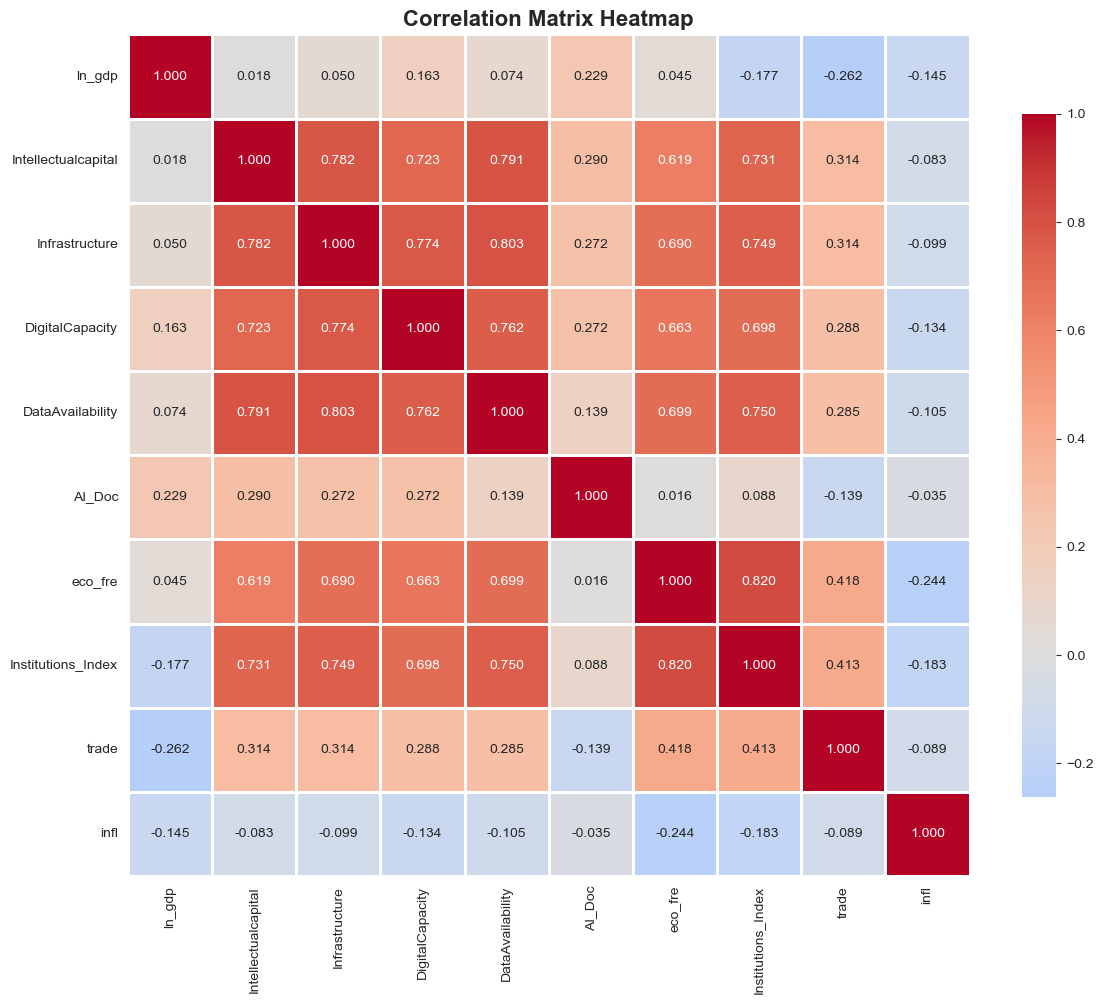

In [135]:
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Select numeric columns for correlation
numeric_cols = ['ln_gdp', 'Intellectualcapital', 'Infrastructure', 'DigitalCapacity',
                'DataAvailability', 'AI_Doc', 'eco_fre', 'Institutions_Index', 
                'trade','infl']

corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

print("\n" + "="*80)
print("Correlation with ln_gdp (sorted):")
print(corr_matrix['ln_gdp'].sort_values(ascending=False))

# Highlight negative correlations
print("\n" + "="*80)
print("NEGATIVE CORRELATIONS WITH ln_gdp:")
negative_corr = corr_matrix['ln_gdp'][corr_matrix['ln_gdp'] < 0].sort_values()
print(negative_corr)

# Visualization: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [136]:
print("\n" + "="*80)
print("COVARIANCE ANALYSIS")
print("="*80)

cov_matrix = df[numeric_cols].cov()
print("\nCovariance Matrix:")
print(cov_matrix)

print("\nCovariance with ln_gdp:")
print(cov_matrix['ln_gdp'].sort_values(ascending=False))



COVARIANCE ANALYSIS

Covariance Matrix:
                          ln_gdp  Intellectualcapital  Infrastructure  \
ln_gdp                 11.954355             0.812892        3.499803   
Intellectualcapital     0.812892           176.913765      219.407413   
Infrastructure          3.499803           219.407413      436.477936   
DigitalCapacity         9.528552           169.996892      283.072352   
DataAvailability        4.989153           213.375534      336.891145   
AI_Doc               3059.552542         16186.377927    25049.763932   
eco_fre                 1.514711            82.954951      146.691645   
Institutions_Index     -1.346677            20.833727       35.577033   
trade                 -49.049381           239.302891      380.445639   
infl                  -27.432295           -60.707061     -126.638372   

                     DigitalCapacity  DataAvailability        AI_Doc  \
ln_gdp                      9.528552          4.989153  3.059553e+03   
Intellectua


TIME SERIES ANALYSIS


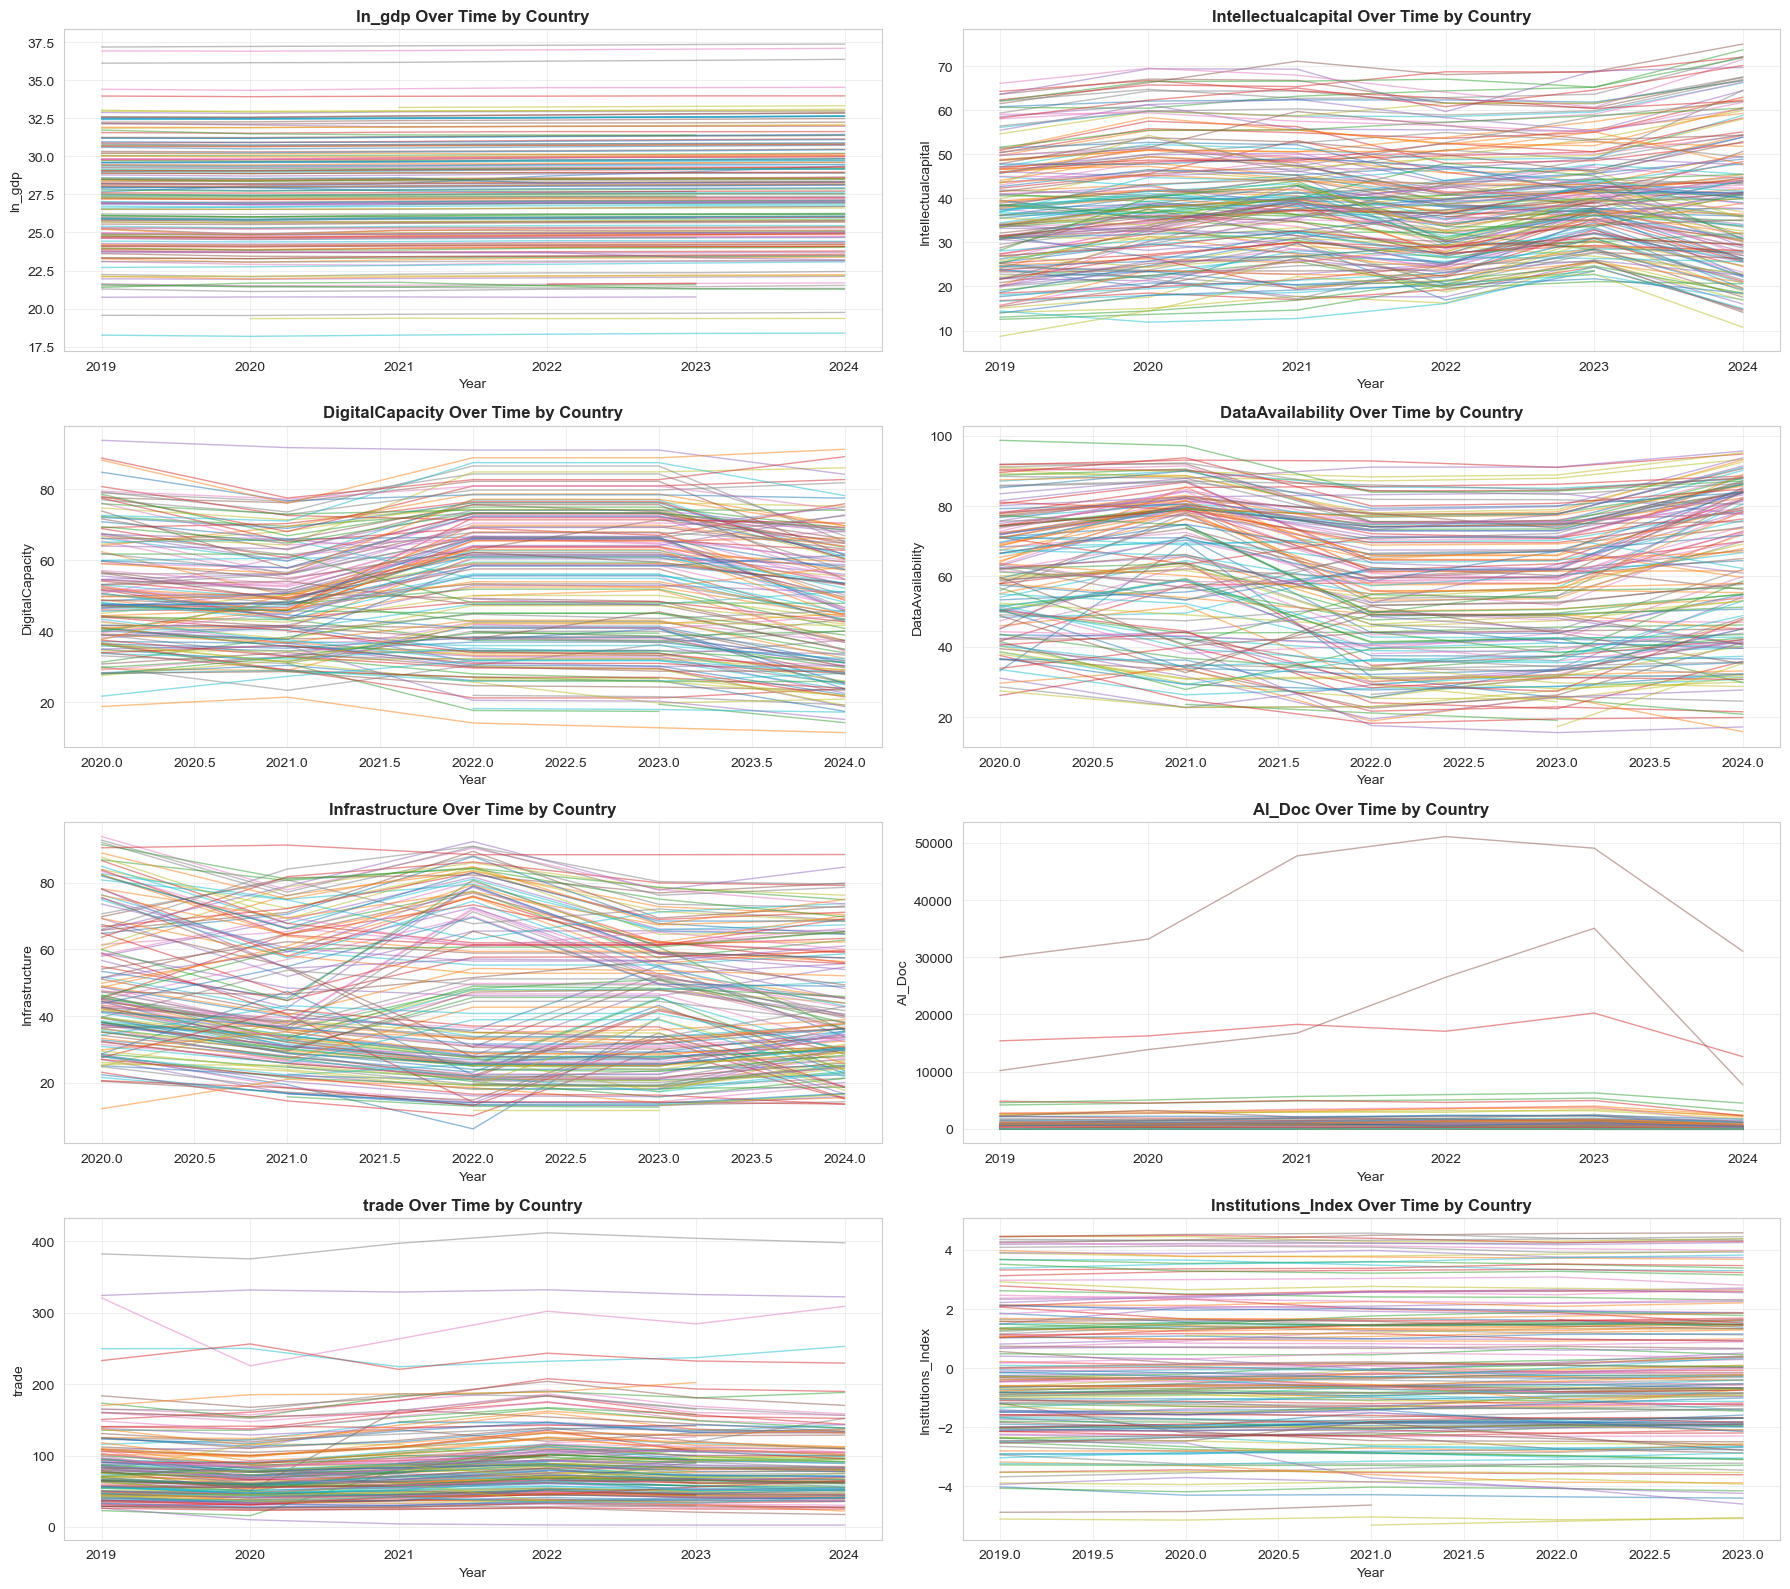

In [137]:
print("\n" + "="*80)
print("TIME SERIES ANALYSIS")
print("="*80)

# Create lagged ln_gdp variable
df_sorted = df.sort_values(['country_name', 'year'])
df_sorted['L_ln_gdp'] = df_sorted.groupby('country_name')['ln_gdp'].shift(1)

# Plot time series for each variable by country
variables = ['ln_gdp', 'Intellectualcapital', 'DigitalCapacity', 
             'DataAvailability', 'Infrastructure', 'AI_Doc', 'trade', 'Institutions_Index']

fig, axes = plt.subplots(4, 2, figsize=(18, 16))
axes = axes.ravel()

for idx, var in enumerate(variables):
    ax = axes[idx]
    for country in df['country_name'].unique():
        country_data = df[df['country_name'] == country].sort_values('year')
        ax.plot(country_data['year'], country_data[var], alpha=0.5, linewidth=1)
    
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel(var, fontsize=10)
    ax.set_title(f'{var} Over Time by Country', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


CREATING PAIRPLOT FOR ALL COUNTRIES


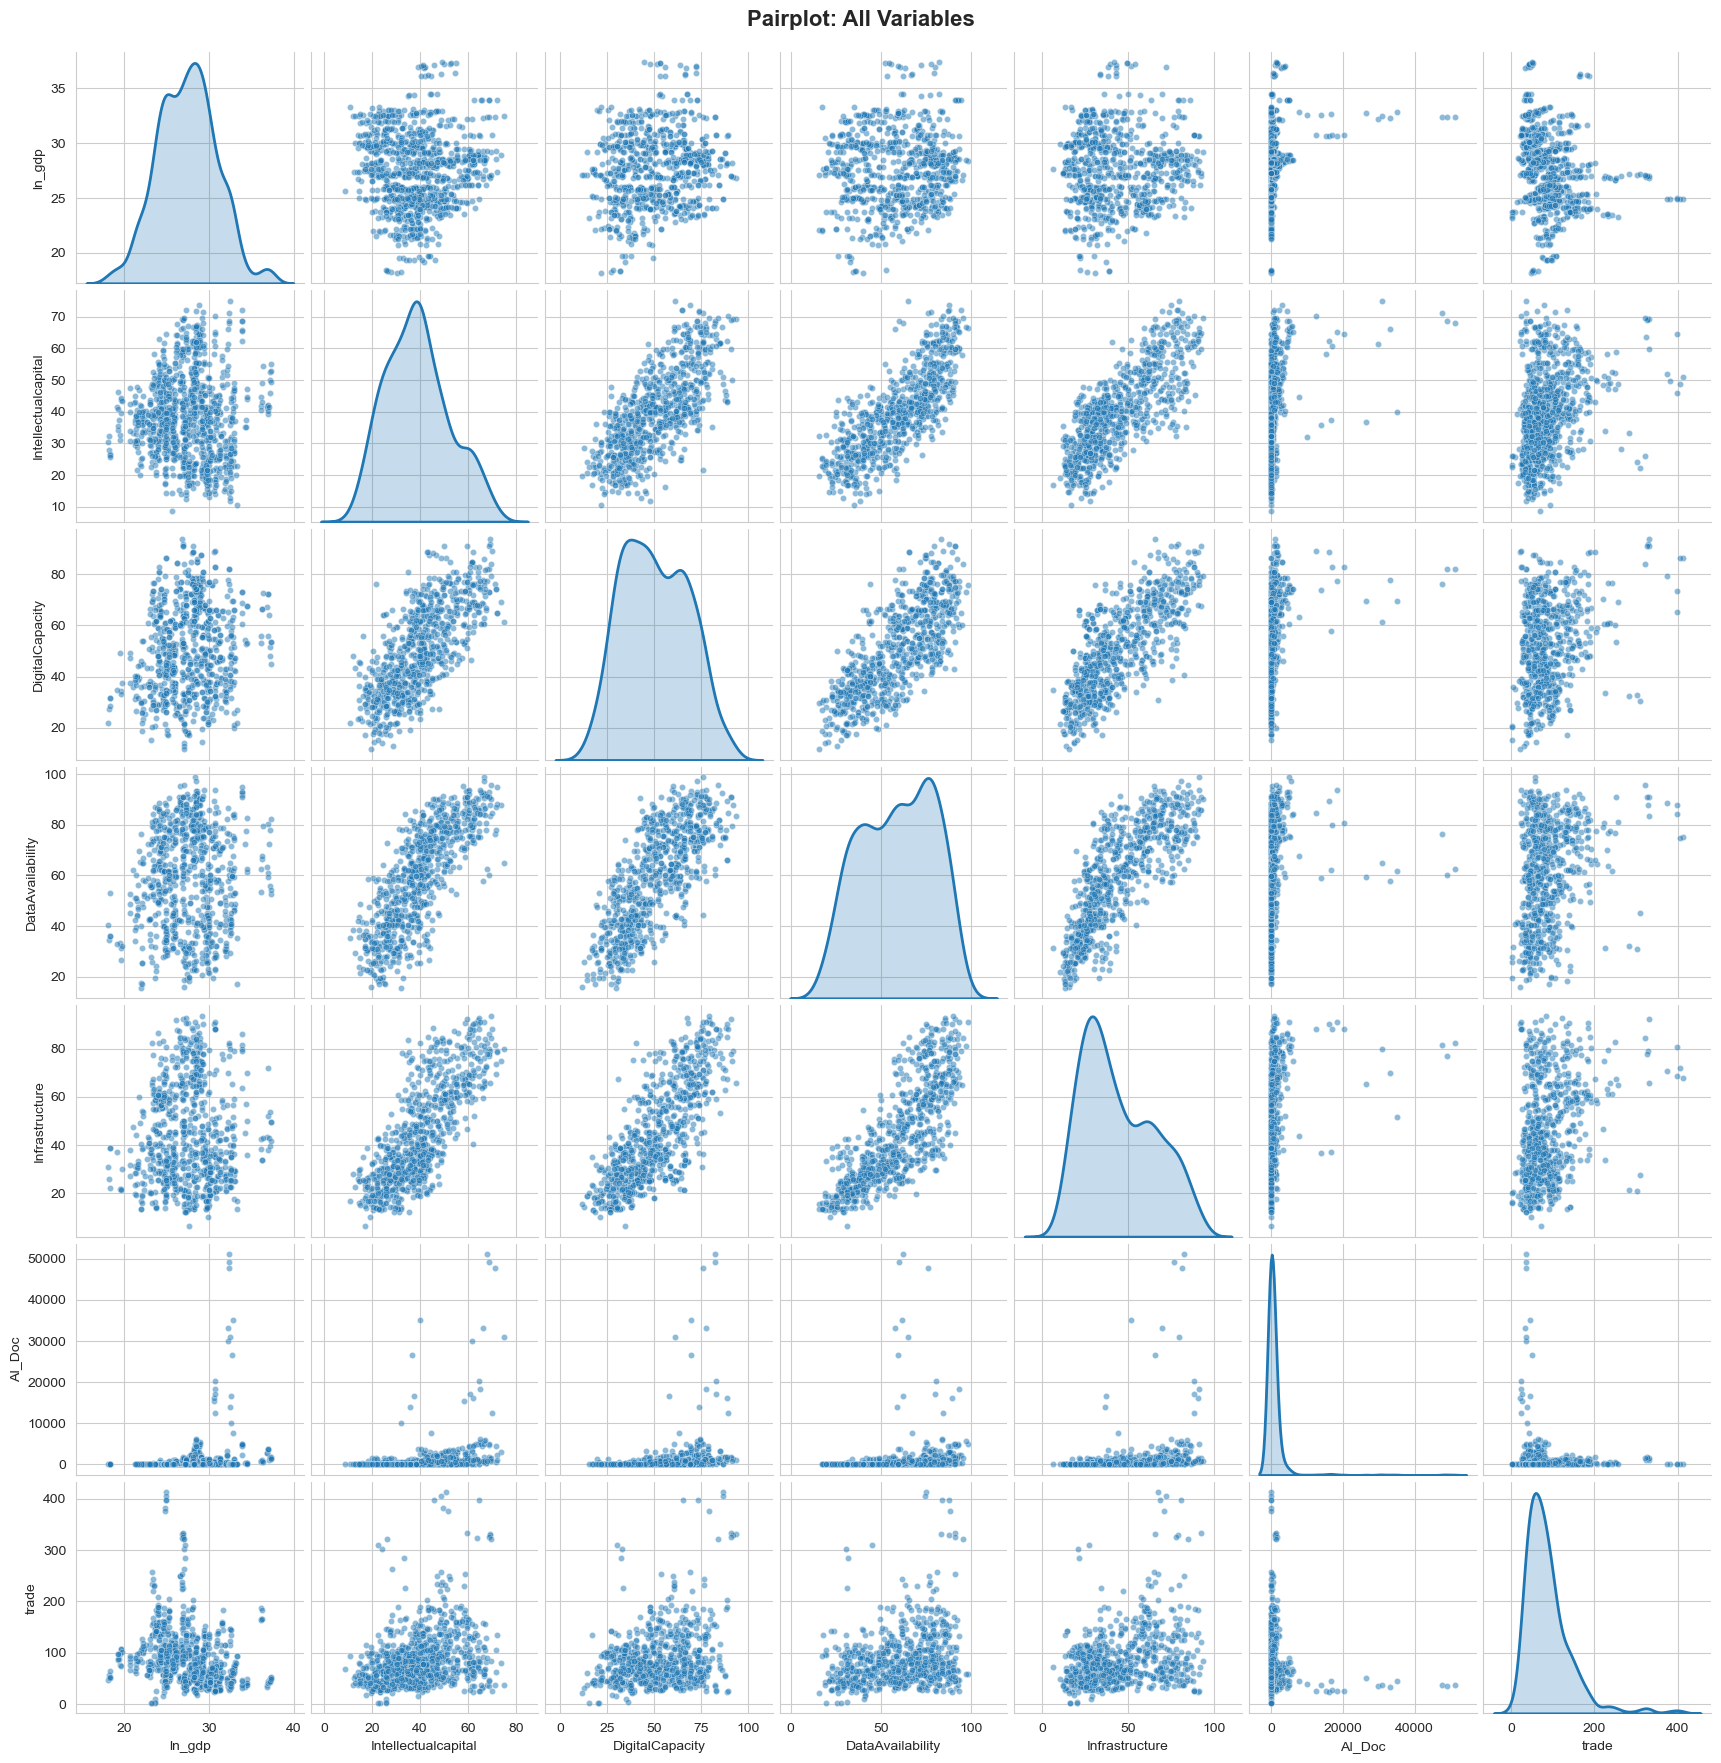

In [138]:
print("\n" + "="*80)
print("CREATING PAIRPLOT FOR ALL COUNTRIES")
print("="*80)

# Select key variables for pairplot
pairplot_vars = ['ln_gdp', 'Intellectualcapital', 'DigitalCapacity', 
                 'DataAvailability', 'Infrastructure', 'AI_Doc', 'trade']

# Create pairplot
g = sns.pairplot(df[pairplot_vars + ['country_name']], 
                 diag_kind='kde', 
                 height=2.5,
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'linewidth': 2})

g.fig.suptitle('Pairplot: All Variables', y=1.01, fontsize=16, fontweight='bold')
plt.show()


CREATING PAIRPLOT WITH TOP/BOTTOM COUNTRIES HIGHLIGHTED

Top 20 Countries (Highest avg gdp):
country_name
Nigeria               31.948831
Guinea                31.963687
Myanmar               32.015391
Russian Federation    32.179745
China                 32.360687
Tanzania              32.512422
Uganda                32.538338
Cambodia              32.545308
Lao PDR               32.553457
Uzbekistan            32.690729
India                 32.698943
Chile                 32.917068
Iraq                  32.984797
Paraguay              33.013671
Somalia               33.274260
Japan                 33.956421
Colombia              34.459295
Viet Nam              36.230318
Indonesia             36.987504
Iran                  37.281607
Name: ln_gdp, dtype: float64

Bottom 20 Countries (Lowest avg gdp):
country_name
Zimbabwe                          18.293971
Marshall Islands                  19.201315
Micronesia, Fed. Sts.             19.349988
Kiribati                          19.640

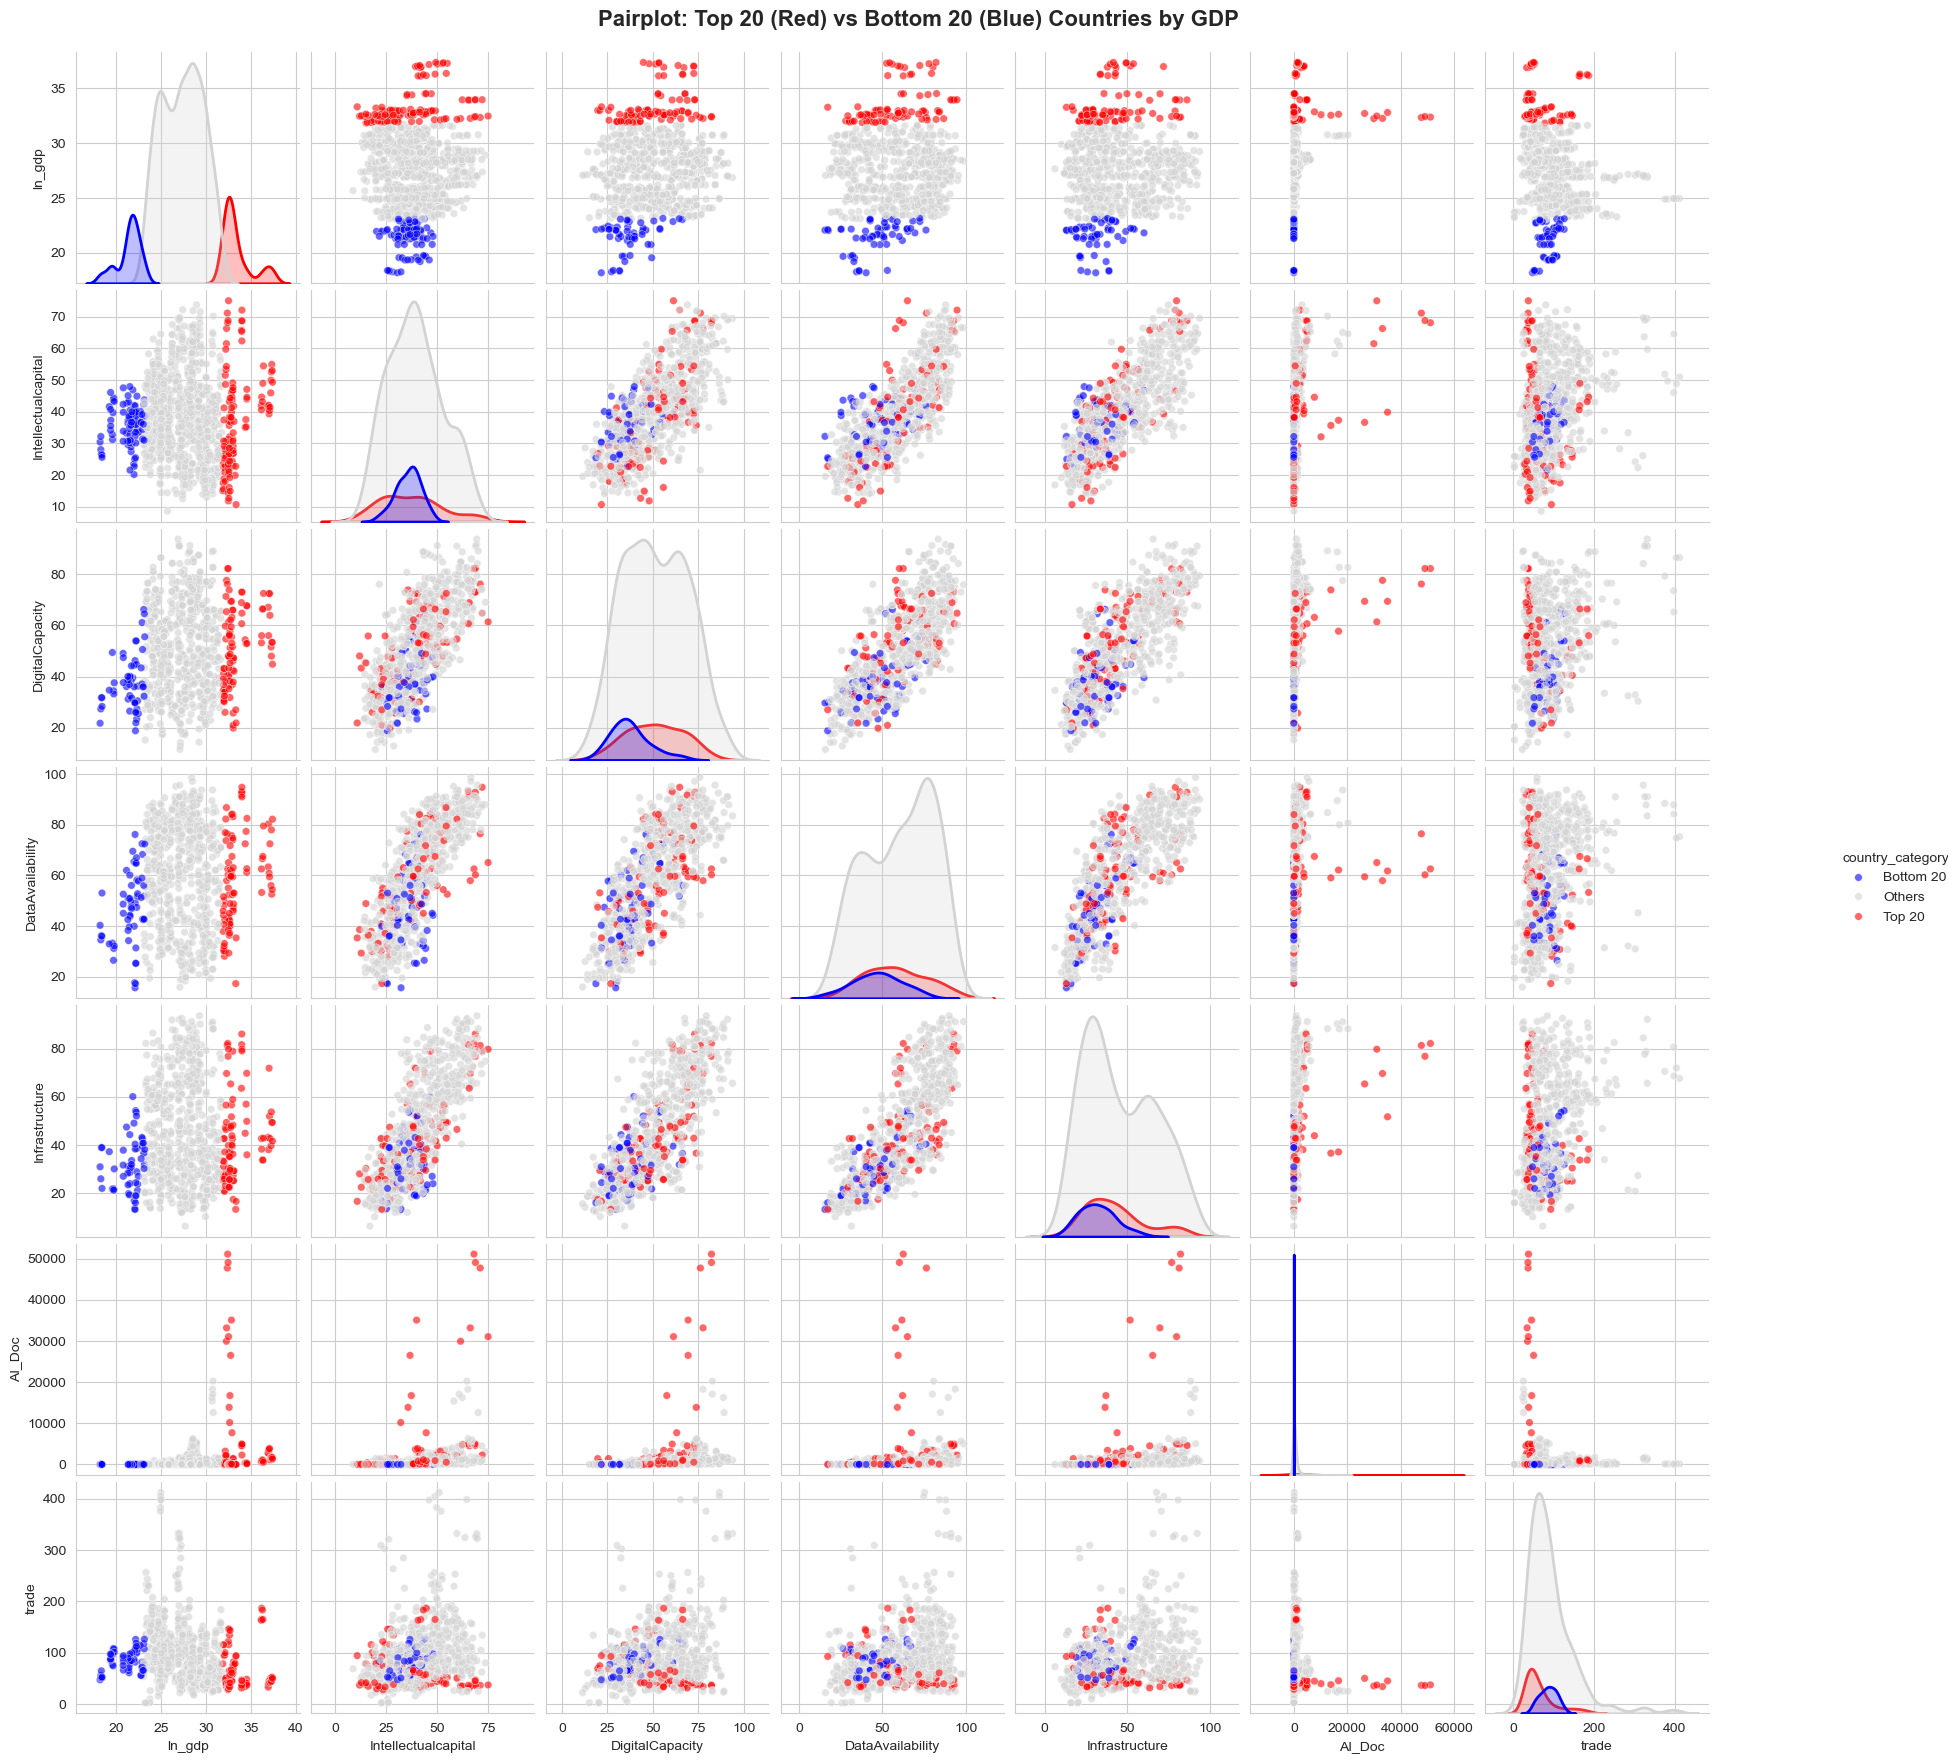

In [139]:
print("\n" + "="*80)
print("CREATING PAIRPLOT WITH TOP/BOTTOM COUNTRIES HIGHLIGHTED")
print("="*80)

# Calculate average ln_gdp per country
avg_gdp = df.groupby('country_name')['ln_gdp'].mean().sort_values()

# Get top 10 and bottom 10 countries
bottom_20 = avg_gdp.head(20).index.tolist()
top_20 = avg_gdp.tail(20).index.tolist()

print("\nTop 20 Countries (Highest avg gdp):")
print(avg_gdp.tail(20))

print("\nBottom 20 Countries (Lowest avg gdp):")
print(avg_gdp.head(20))

# Create category column
def categorize_country(country):
    if country in top_20:
        return 'Top 20'
    elif country in bottom_20:
        return 'Bottom 20'
    else:
        return 'Others'

df['country_category'] = df['country_name'].apply(categorize_country)

# Create pairplot with highlighted categories
g2 = sns.pairplot(df[pairplot_vars + ['country_category']], 
                  hue='country_category',
                  hue_order=['Bottom 20', 'Others', 'Top 20'],
                  palette={'Top 20': 'red', 'Bottom 20': 'blue', 'Others': 'lightgray'},
                  diag_kind='kde',
                  height=2.5,
                  plot_kws={'alpha': 0.6, 's': 30},
                  diag_kws={'linewidth': 2})

g2.fig.suptitle('Pairplot: Top 20 (Red) vs Bottom 20 (Blue) Countries by GDP', 
                y=1.01, fontsize=16, fontweight='bold')
g2._legend.set_bbox_to_anchor((1.05, 0.5))
plt.show()



CREATING PAIRPLOT WITH TOP/BOTTOM COUNTRIES HIGHLIGHTED

Top 10 Countries (Highest AI_Doc):
country_name
Australia          16768.0
Indonesia          17606.0
Canada             17758.0
Italy              19008.0
Japan              26178.0
Germany            27046.0
United Kingdom     32041.0
United States      99845.0
India             110068.0
China             242048.0
Name: AI_Doc, dtype: float64

Bottom 10 Countries (Lowest Ai_Doc):
country_name
Comoros                  0.0
North Macedonia          0.0
Cote d'Ivoire            0.0
Lao PDR                  0.0
Cabo Verde               0.0
Greenland                0.0
Seychelles               0.0
Micronesia, Fed. Sts.    0.0
St. Kitts and Nevis      0.0
Djibouti                 0.0
Name: AI_Doc, dtype: float64


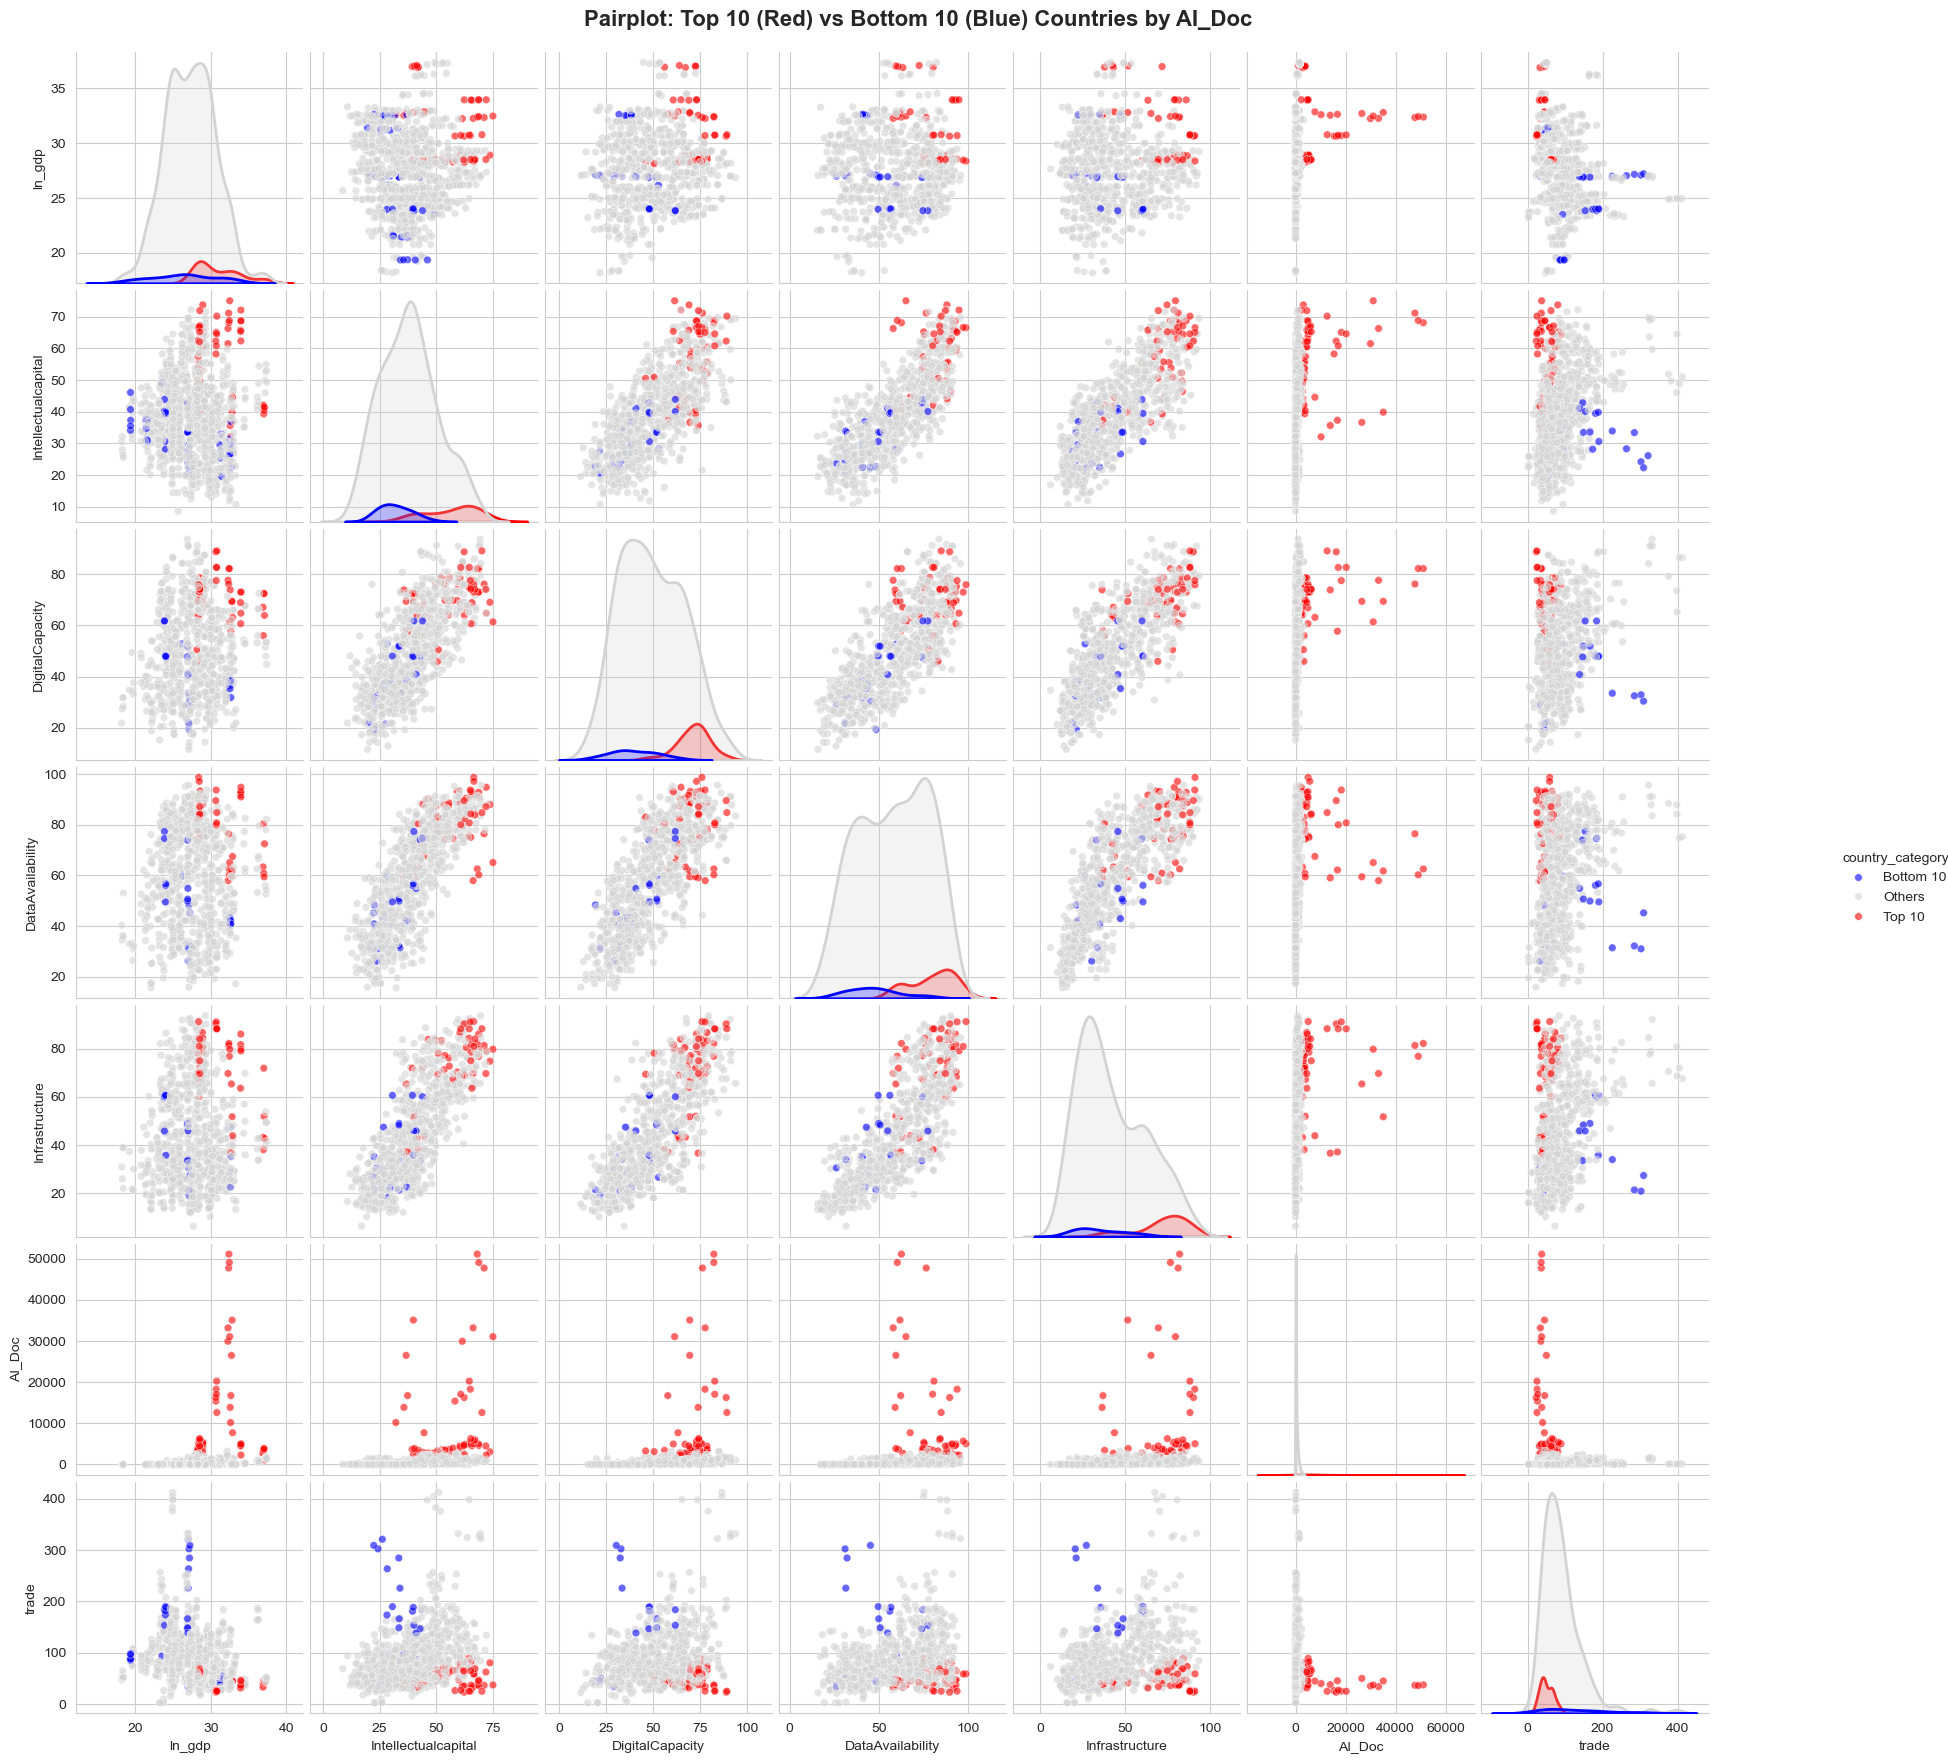

In [ ]:
print("\n" + "="*80)
print("CREATING PAIRPLOT WITH TOP/BOTTOM COUNTRIES HIGHLIGHTED")
print("="*80)

# Calculate average AI_Doc per country
sum_AIdoc = df.groupby('country_name')['AI_Doc'].sum().sort_values()

# Get top 10 and bottom 10 countries
bottom_10 = sum_AIdoc.head(10).index.tolist()
top_10 = sum_AIdoc.tail(10).index.tolist()

print("\nTop 10 Countries (Highest AI_Doc):")
print(sum_AIdoc.tail(10))

print("\nBottom 10 Countries (Lowest Ai_Doc):")
print(sum_AIdoc.head(10))

# Create category column
def categorize_country(country):
    if country in top_10:
        return 'Top 10'
    elif country in bottom_10:
        return 'Bottom 10'
    else:
        return 'Others'

df['country_category'] = df['country_name'].apply(categorize_country)

# Create pairplot with highlighted categories
g2 = sns.pairplot(df[pairplot_vars + ['country_category']], 
                  hue='country_category',
                  hue_order=['Bottom 10', 'Others', 'Top 10'],
                  palette={'Top 10': 'red', 'Bottom 10': 'blue', 'Others': 'lightgray'},
                  diag_kind='kde',
                  height=2.5,
                  plot_kws={'alpha': 0.6, 's': 30},
                  diag_kws={'linewidth': 2})

g2.fig.suptitle('Pairplot: Top 10 (Red) vs Bottom 10 (Blue) Countries by AI_Doc', 
                y=1.01, fontsize=16, fontweight='bold')
g2._legend.set_bbox_to_anchor((1.05, 0.5))
plt.show()




CREATING PAIRPLOT FOR TOP 10 COUNTRIES (Highest AI_Doc)


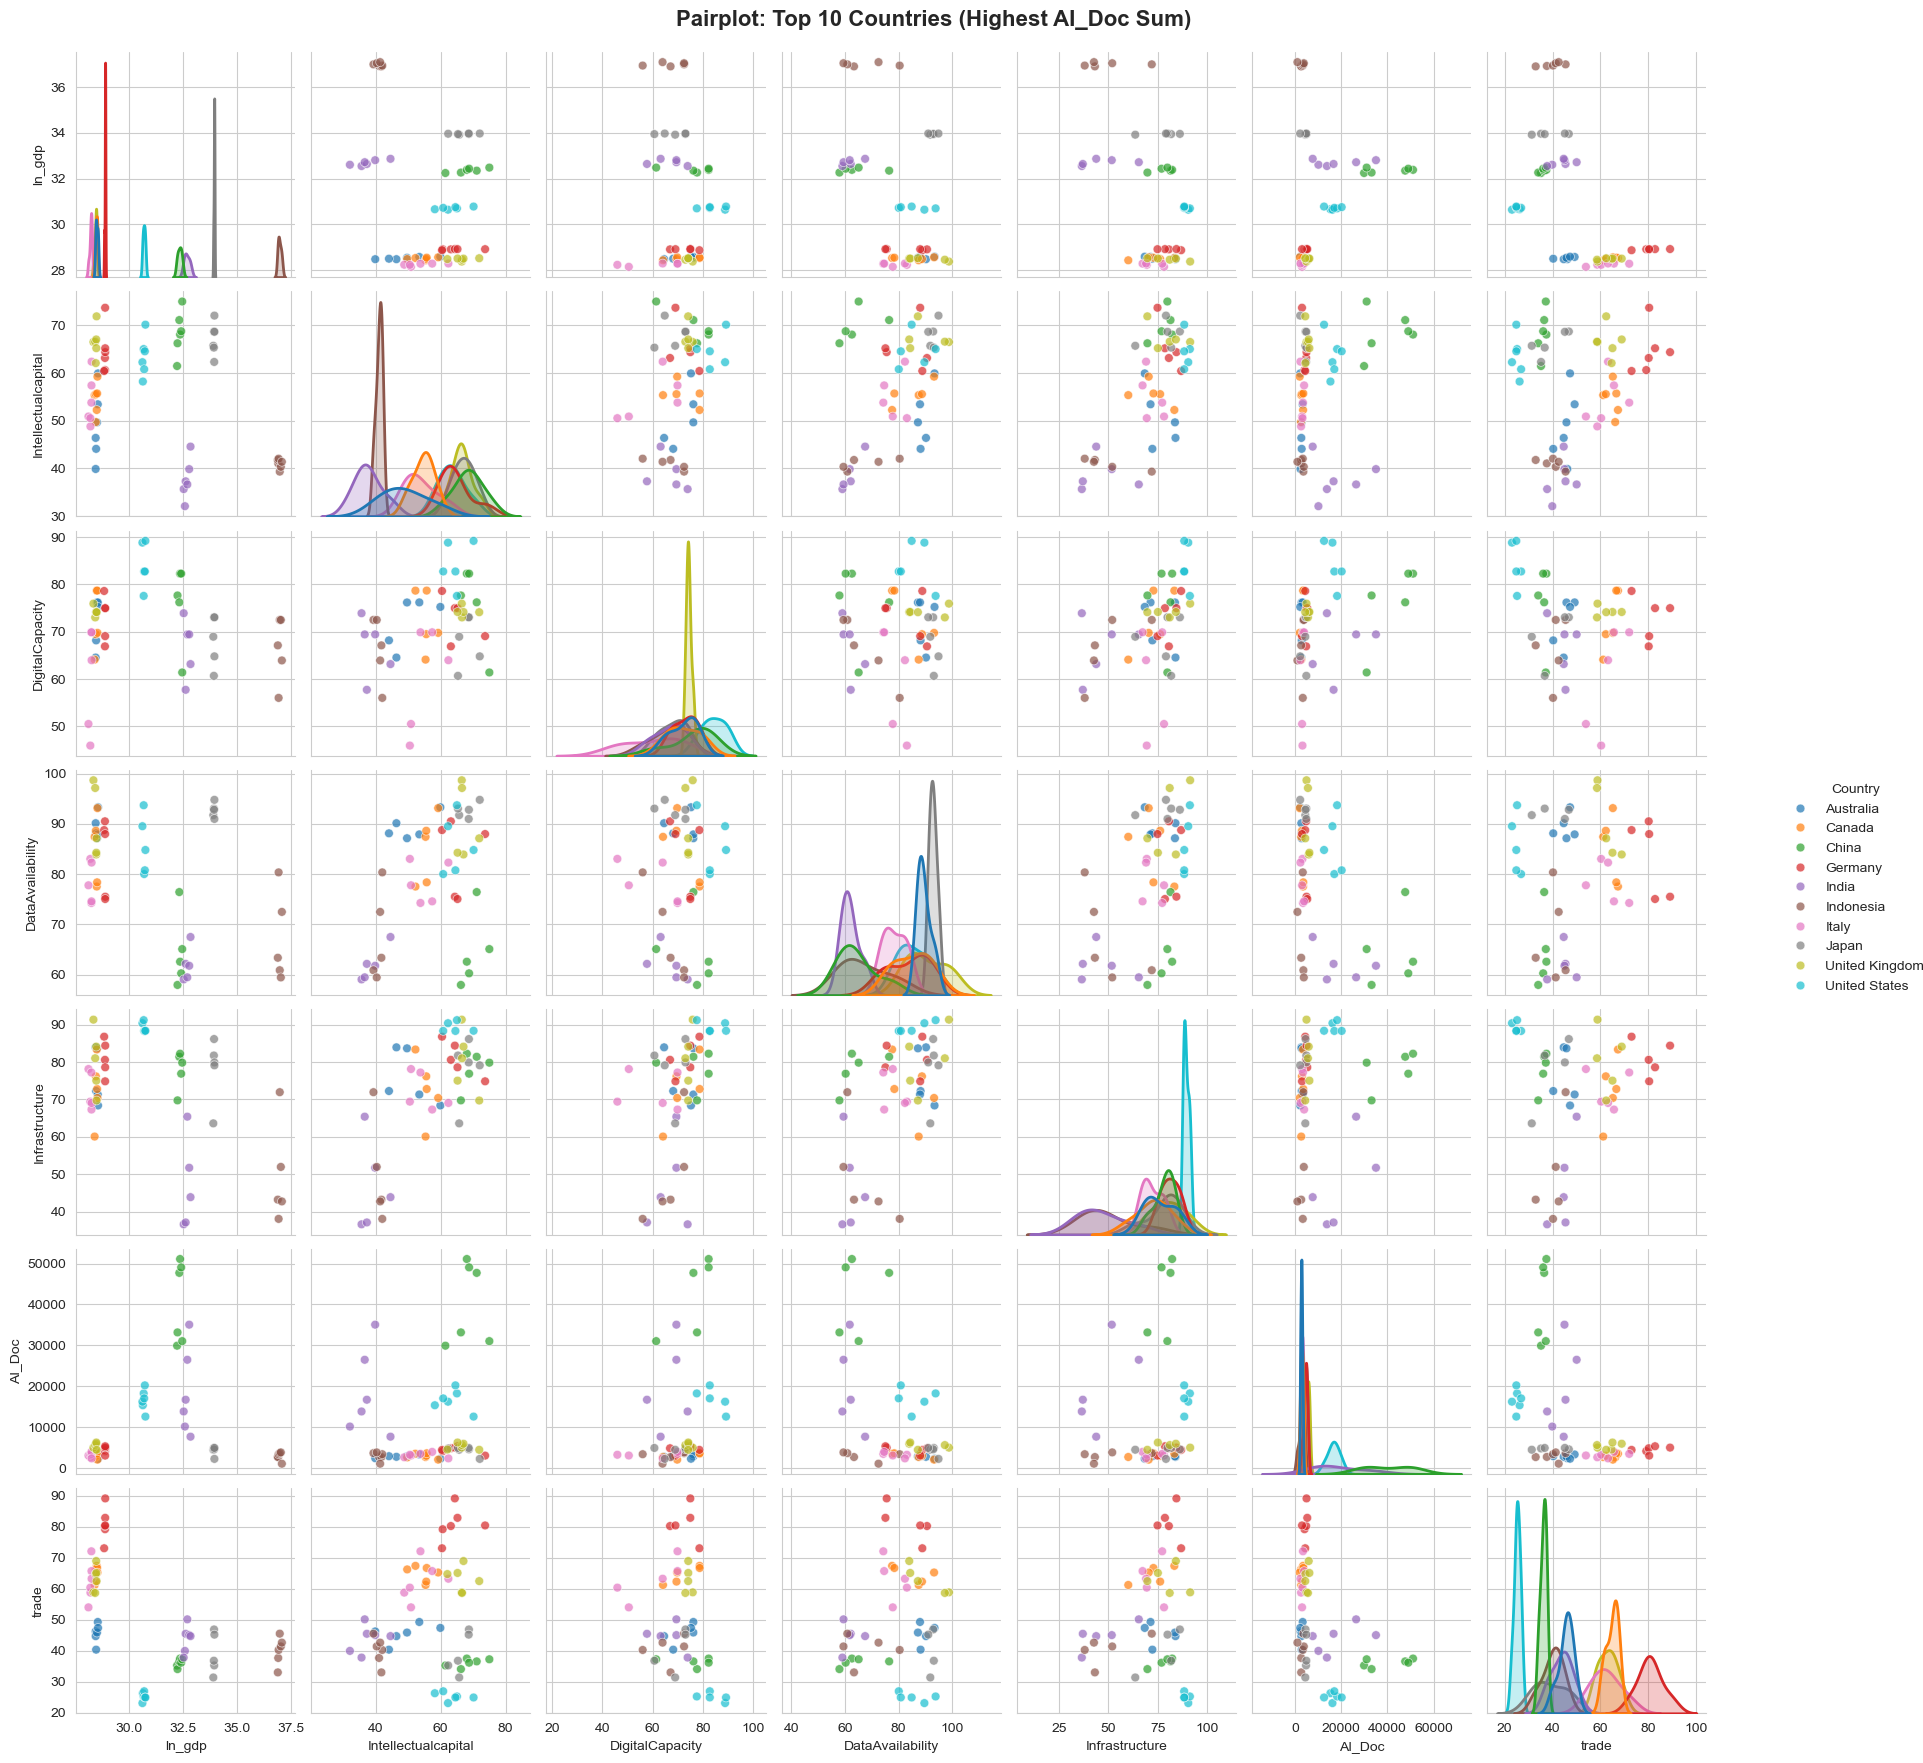


CREATING PAIRPLOT FOR BOTTOM 10 COUNTRIES (Lowest AI_Doc)


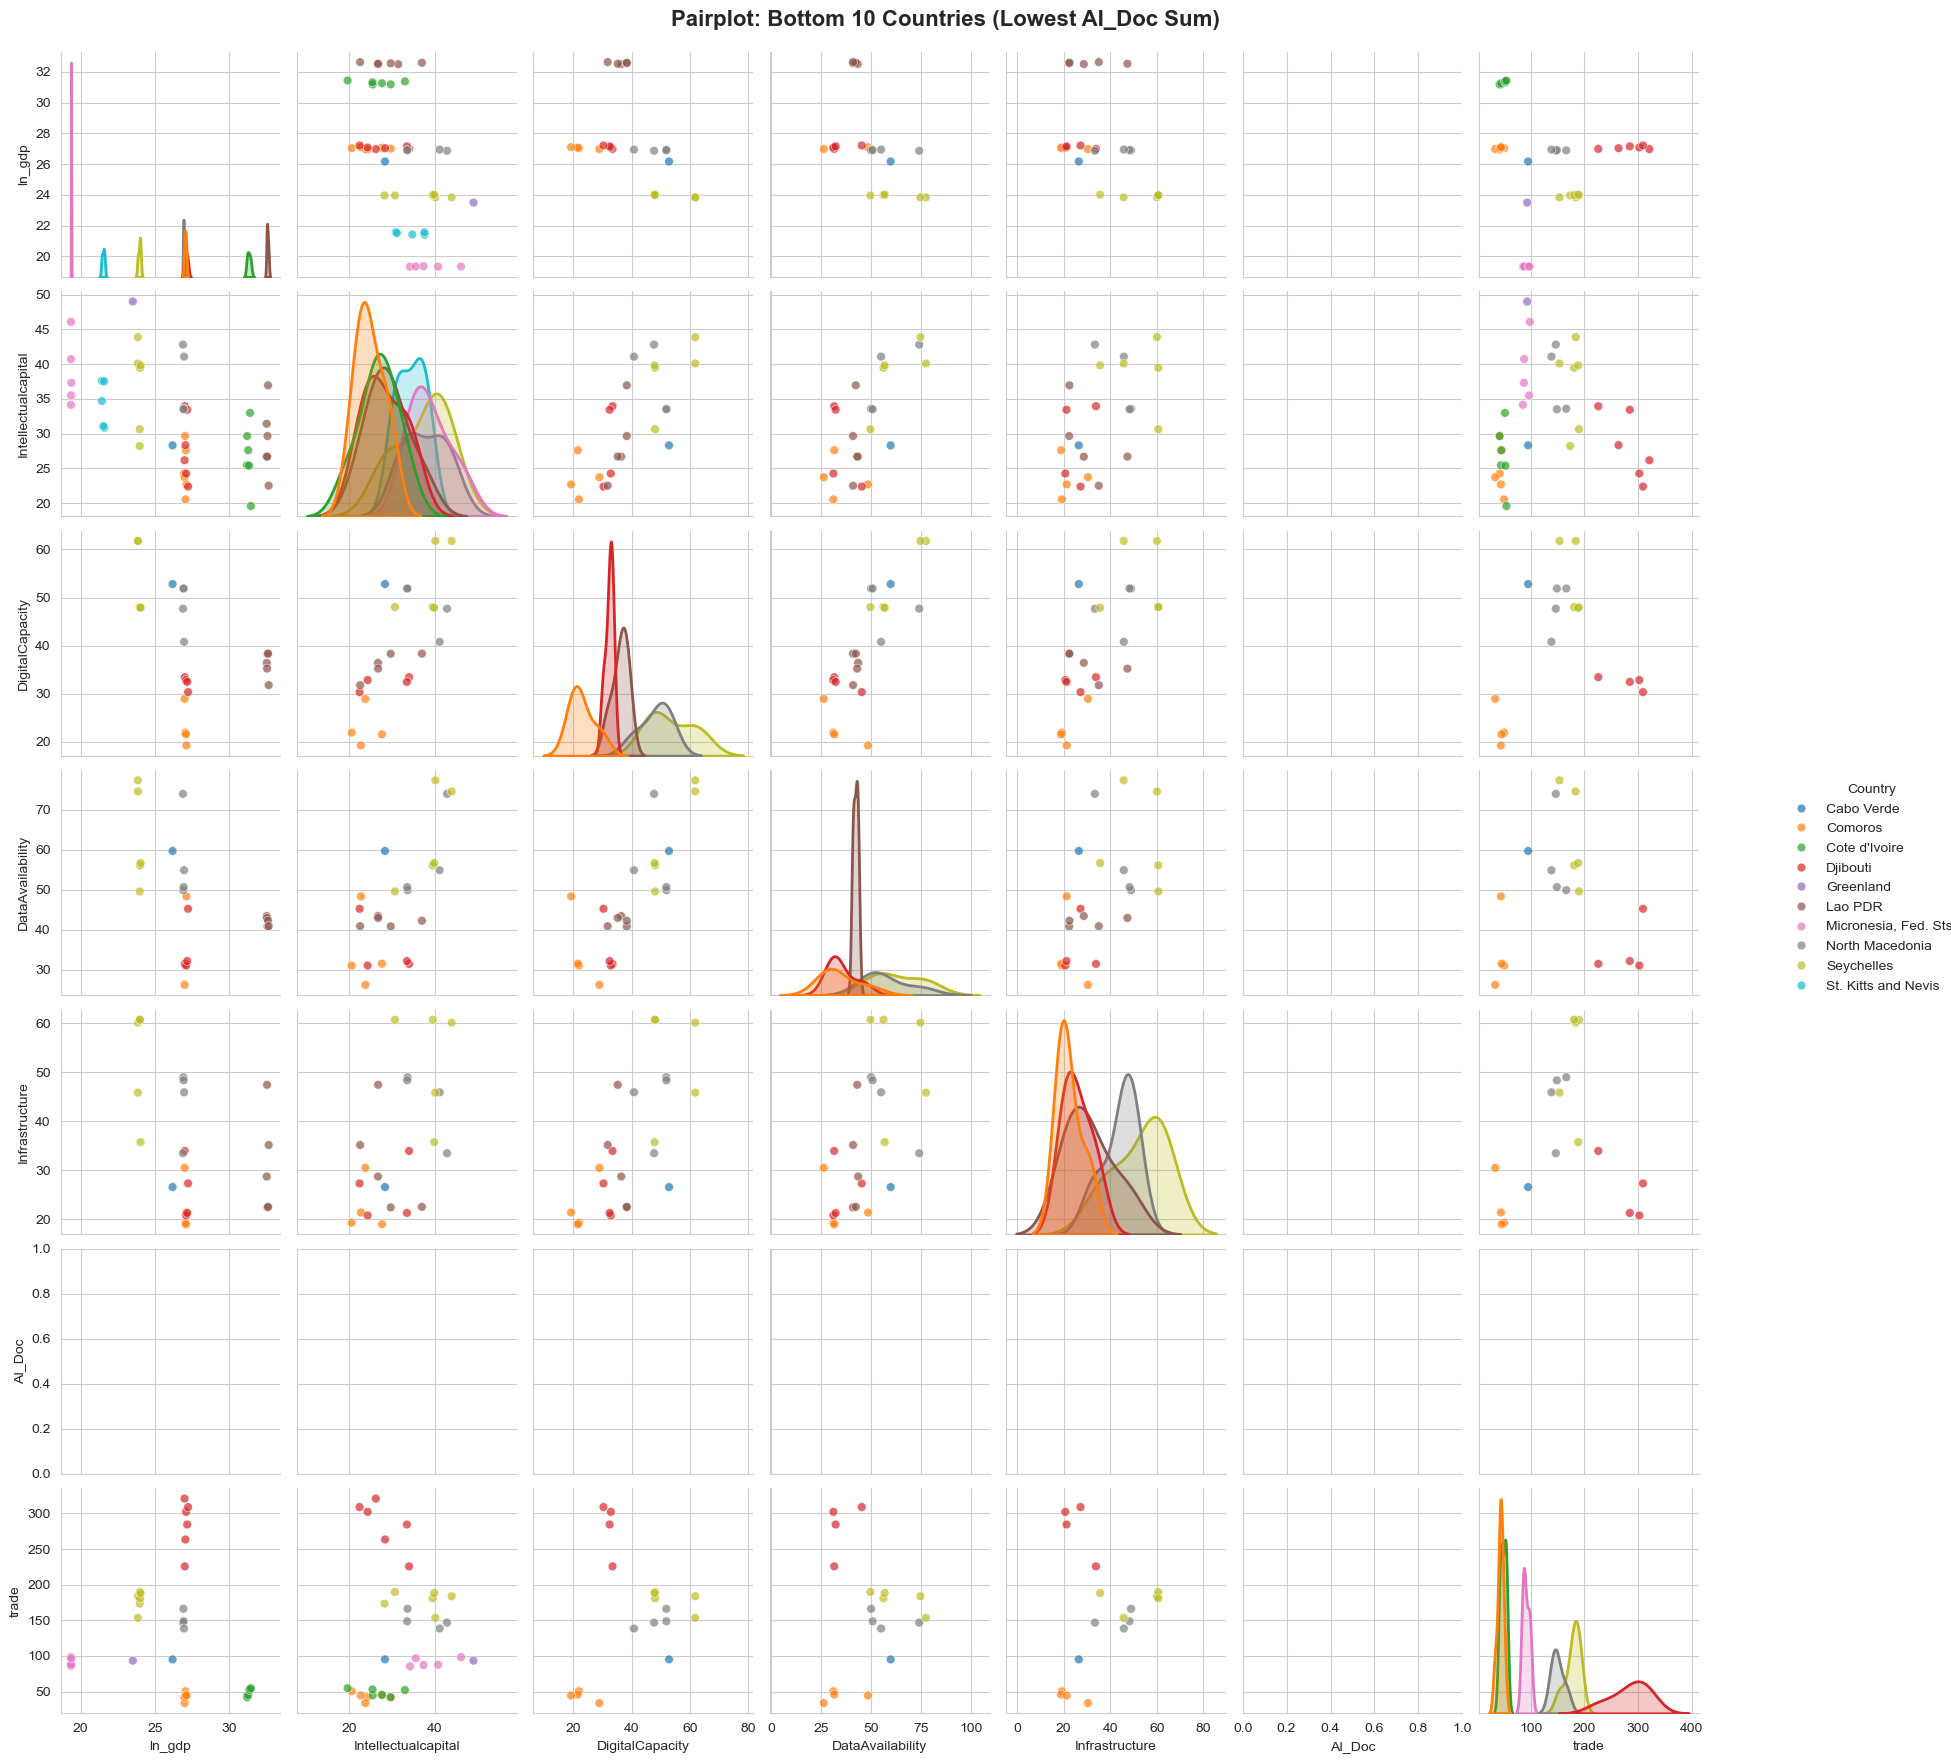

In [148]:
# ============================================================================
# 6A. SEPARATE PAIRPLOT FOR TOP 10 COUNTRIES
# ============================================================================
print("\n" + "="*80)
print("CREATING PAIRPLOT FOR TOP 10 COUNTRIES (Highest AI_Doc)")
print("="*80)

# Filter data for top 10 countries
df_top10 = df[df['country_category'] == 'Top 10'].copy()

# Create pairplot for top 10
g_top = sns.pairplot(df_top10[pairplot_vars + ['country_name']], 
                     hue='country_name',
                     diag_kind='kde',
                     height=2.5,
                     plot_kws={'alpha': 0.7, 's': 40},
                     diag_kws={'linewidth': 2},
                     palette='tab10')

g_top.fig.suptitle('Pairplot: Top 10 Countries (Highest AI_Doc Sum)', 
                   y=1.01, fontsize=16, fontweight='bold')
g_top._legend.set_bbox_to_anchor((1.02, 0.5))
g_top._legend.set_title('Country')
plt.show()



# ============================================================================
# 6B. SEPARATE PAIRPLOT FOR BOTTOM 10 COUNTRIES
# ============================================================================
print("\n" + "="*80)
print("CREATING PAIRPLOT FOR BOTTOM 10 COUNTRIES (Lowest AI_Doc)")
print("="*80)

# Filter data for bottom 10 countries
df_bottom10 = df[df['country_category'] == 'Bottom 10'].copy()

# Create pairplot for bottom 10
g_bottom = sns.pairplot(df_bottom10[pairplot_vars + ['country_name']], 
                        hue='country_name',
                        diag_kind='kde',
                        height=2.5,
                        plot_kws={'alpha': 0.7, 's': 40},
                        diag_kws={'linewidth': 2},
                        palette='tab10')

g_bottom.fig.suptitle('Pairplot: Bottom 10 Countries (Lowest AI_Doc Sum)', 
                      y=1.01, fontsize=16, fontweight='bold')
g_bottom._legend.set_bbox_to_anchor((1.02, 0.5))
g_bottom._legend.set_title('Country')
plt.show()

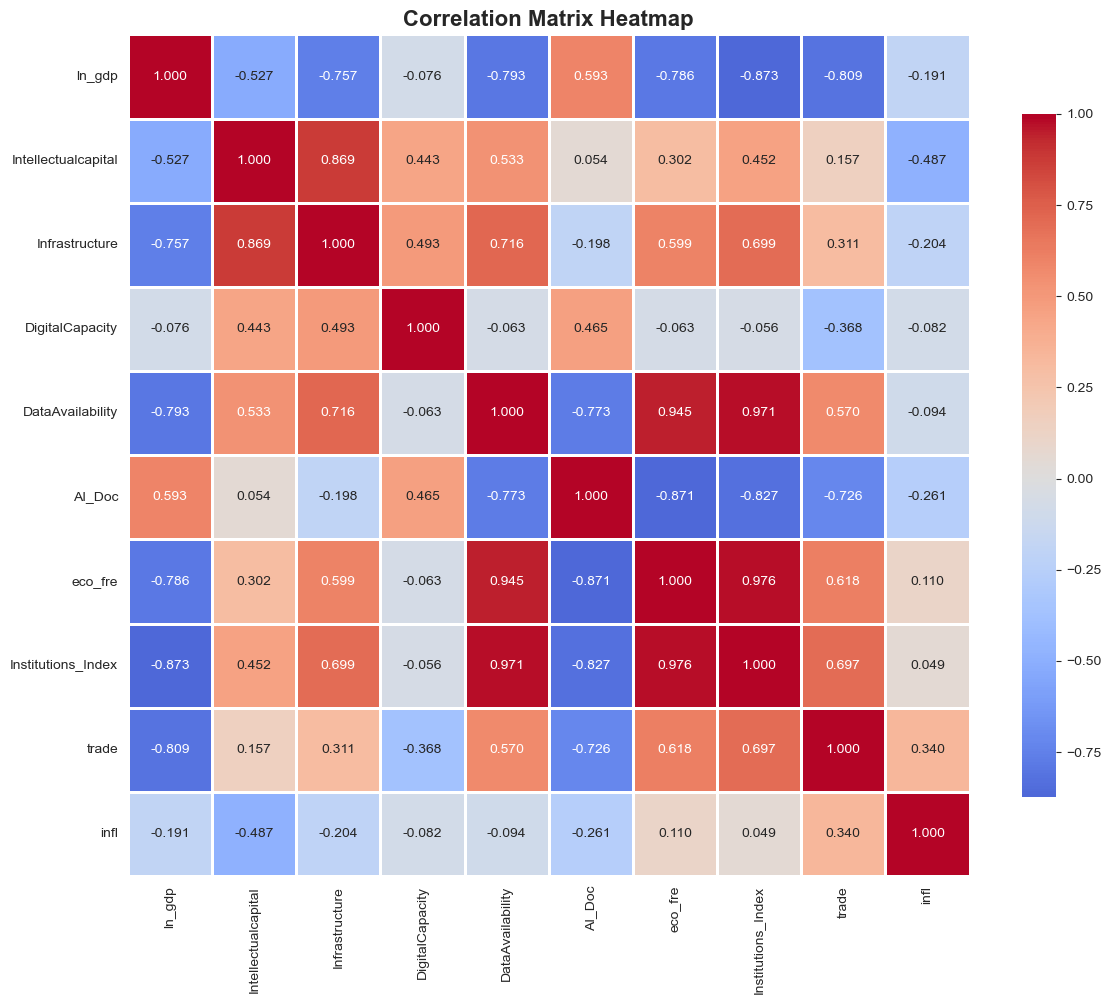

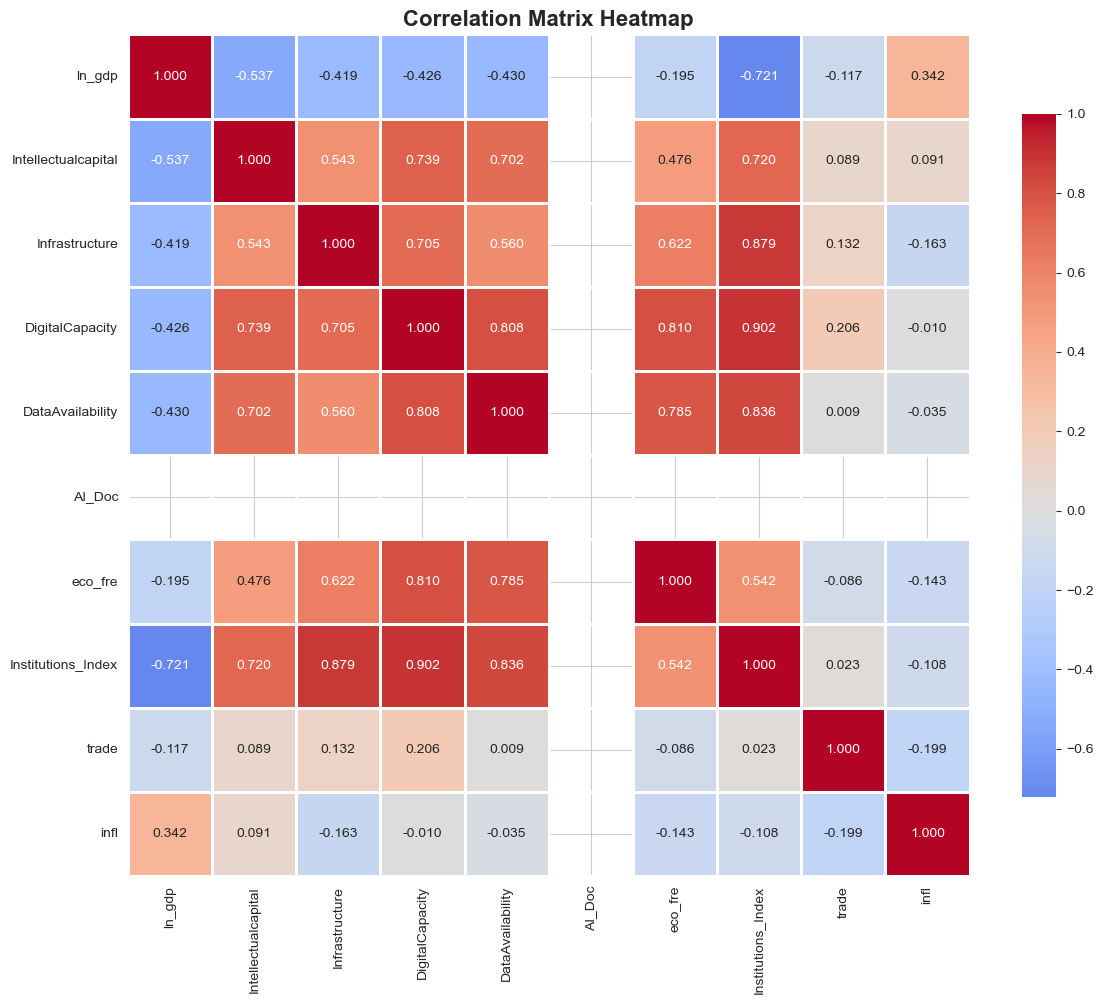

In [150]:
# Visualization: Correlation Heatmap
df_top10 = df_top10[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_top10, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualization: Correlation Heatmap
df_bottom10 = df_bottom10[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_bottom10, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


FOCUSED ANALYSIS: DataAvailability & Infrastructure vs ln_gdp


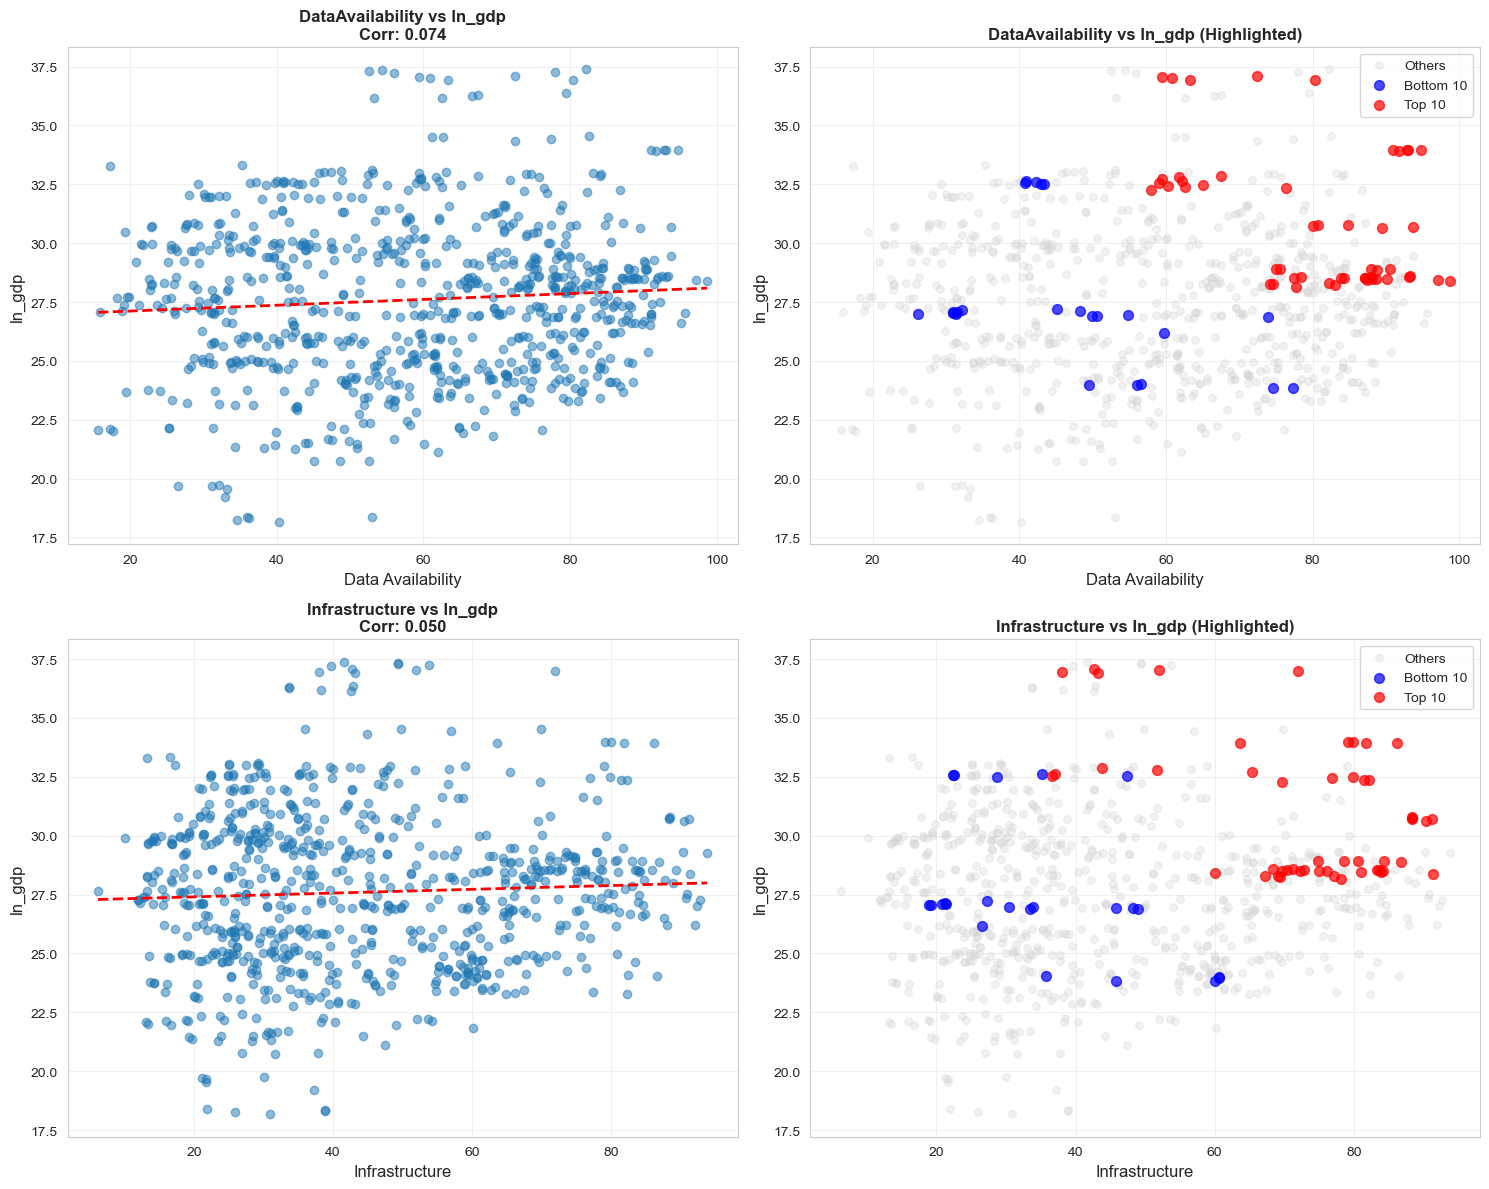


STATISTICAL TESTS FOR NEGATIVE CORRELATIONS

DataAvailability vs ln_gdp:
  Pearson r: 0.0742
  P-value: 3.7049e-02
  Significant: Yes

Infrastructure vs ln_gdp:
  Pearson r: 0.0500
  P-value: 1.5984e-01
  Significant: No


In [142]:
print("\n" + "="*80)
print("FOCUSED ANALYSIS: DataAvailability & Infrastructure vs ln_gdp")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# DataAvailability vs ln_gdp - All countries
axes[0, 0].scatter(df['DataAvailability'], df['ln_gdp'], alpha=0.5)
z = np.polyfit(df['DataAvailability'].dropna(), 
               df.loc[df['DataAvailability'].notna(), 'ln_gdp'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['DataAvailability'].sort_values(), 
                p(df['DataAvailability'].sort_values()), "r--", linewidth=2)
axes[0, 0].set_xlabel('Data Availability', fontsize=12)
axes[0, 0].set_ylabel('ln_gdp', fontsize=12)
axes[0, 0].set_title(f'DataAvailability vs ln_gdp\nCorr: {df["DataAvailability"].corr(df["ln_gdp"]):.3f}',
                     fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# DataAvailability vs ln_gdp - Highlighted
scatter1 = axes[0, 1].scatter(df[df['country_category']=='Others']['DataAvailability'], 
                              df[df['country_category']=='Others']['ln_gdp'], 
                              alpha=0.3, c='lightgray', s=30, label='Others')
scatter2 = axes[0, 1].scatter(df[df['country_category']=='Bottom 10']['DataAvailability'], 
                              df[df['country_category']=='Bottom 10']['ln_gdp'], 
                              alpha=0.7, c='blue', s=50, label='Bottom 10')
scatter3 = axes[0, 1].scatter(df[df['country_category']=='Top 10']['DataAvailability'], 
                              df[df['country_category']=='Top 10']['ln_gdp'], 
                              alpha=0.7, c='red', s=50, label='Top 10')
axes[0, 1].set_xlabel('Data Availability', fontsize=12)
axes[0, 1].set_ylabel('ln_gdp', fontsize=12)
axes[0, 1].set_title('DataAvailability vs ln_gdp (Highlighted)', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Infrastructure vs ln_gdp - All countries
axes[1, 0].scatter(df['Infrastructure'], df['ln_gdp'], alpha=0.5)
z = np.polyfit(df['Infrastructure'].dropna(), 
               df.loc[df['Infrastructure'].notna(), 'ln_gdp'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df['Infrastructure'].sort_values(), 
                p(df['Infrastructure'].sort_values()), "r--", linewidth=2)
axes[1, 0].set_xlabel('Infrastructure', fontsize=12)
axes[1, 0].set_ylabel('ln_gdp', fontsize=12)
axes[1, 0].set_title(f'Infrastructure vs ln_gdp\nCorr: {df["Infrastructure"].corr(df["ln_gdp"]):.3f}',
                     fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Infrastructure vs ln_gdp - Highlighted
scatter1 = axes[1, 1].scatter(df[df['country_category']=='Others']['Infrastructure'], 
                              df[df['country_category']=='Others']['ln_gdp'], 
                              alpha=0.3, c='lightgray', s=30, label='Others')
scatter2 = axes[1, 1].scatter(df[df['country_category']=='Bottom 10']['Infrastructure'], 
                              df[df['country_category']=='Bottom 10']['ln_gdp'], 
                              alpha=0.7, c='blue', s=50, label='Bottom 10')
scatter3 = axes[1, 1].scatter(df[df['country_category']=='Top 10']['Infrastructure'], 
                              df[df['country_category']=='Top 10']['ln_gdp'], 
                              alpha=0.7, c='red', s=50, label='Top 10')
axes[1, 1].set_xlabel('Infrastructure', fontsize=12)
axes[1, 1].set_ylabel('ln_gdp', fontsize=12)
axes[1, 1].set_title('Infrastructure vs ln_gdp (Highlighted)', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical tests for negative correlations
print("\n" + "="*80)
print("STATISTICAL TESTS FOR NEGATIVE CORRELATIONS")
print("="*80)

# DataAvailability
pearson_r, p_value = stats.pearsonr(df['DataAvailability'].dropna(), 
                                     df.loc[df['DataAvailability'].notna(), 'ln_gdp'])
print(f"\nDataAvailability vs ln_gdp:")
print(f"  Pearson r: {pearson_r:.4f}")
print(f"  P-value: {p_value:.4e}")
print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")

# Infrastructure
pearson_r, p_value = stats.pearsonr(df['Infrastructure'].dropna(), 
                                     df.loc[df['Infrastructure'].notna(), 'ln_gdp'])
print(f"\nInfrastructure vs ln_gdp:")
print(f"  Pearson r: {pearson_r:.4f}")
print(f"  P-value: {p_value:.4e}")
print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")



CREATING BOX PLOTS


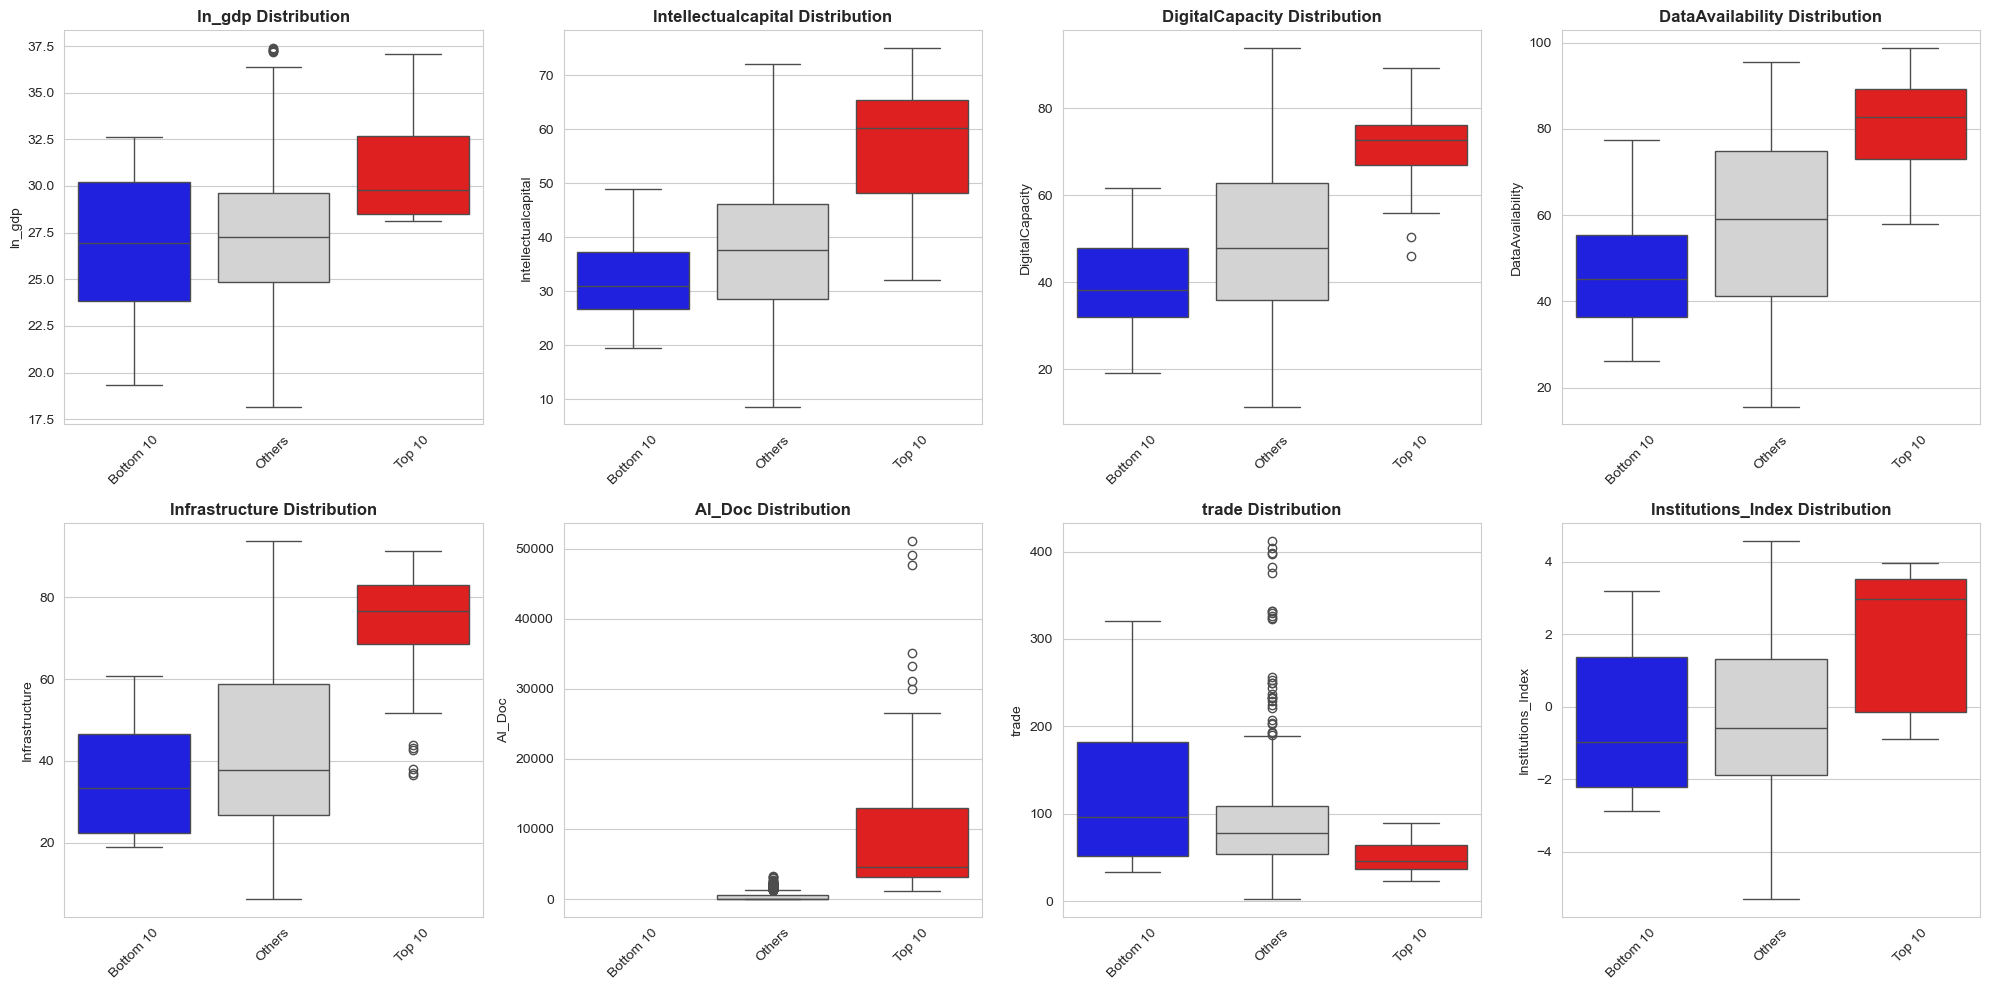

In [145]:
print("\n" + "="*80)
print("CREATING BOX PLOTS")
print("="*80)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

plot_vars = ['ln_gdp', 'Intellectualcapital', 'DigitalCapacity', 
             'DataAvailability', 'Infrastructure', 'AI_Doc', 'trade', 'Institutions_Index']

for idx, var in enumerate(plot_vars):
    sns.boxplot(data=df, x='country_category', y=var, 
                order=['Bottom 10', 'Others', 'Top 10'],
                palette={'Top 10': 'red', 'Bottom 10': 'blue', 'Others': 'lightgray'},
                ax=axes[idx])
    axes[idx].set_title(f'{var} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
